In [1]:
import pandas as pd
import numpy as np

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

Packages for Mathematical Computation and visualization imported!
Pipeline and preprocessing packages imported!


In [4]:
irl = pd.read_csv('initial-ml-test-dub-1.csv', index_col = 'Unnamed: 0')

In [5]:
irl.head()

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar,DistanceShops
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,...,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900,3.568079
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,...,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557,0.255856
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,...,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356,3.002563
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,...,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934,1.206681
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,...,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952,1.815296


### Box Plot of Prices in Different Towns

Visuals that could be used for final write-up.

Text(0.5, 1.0, 'Price Distribution per Town in dataset')

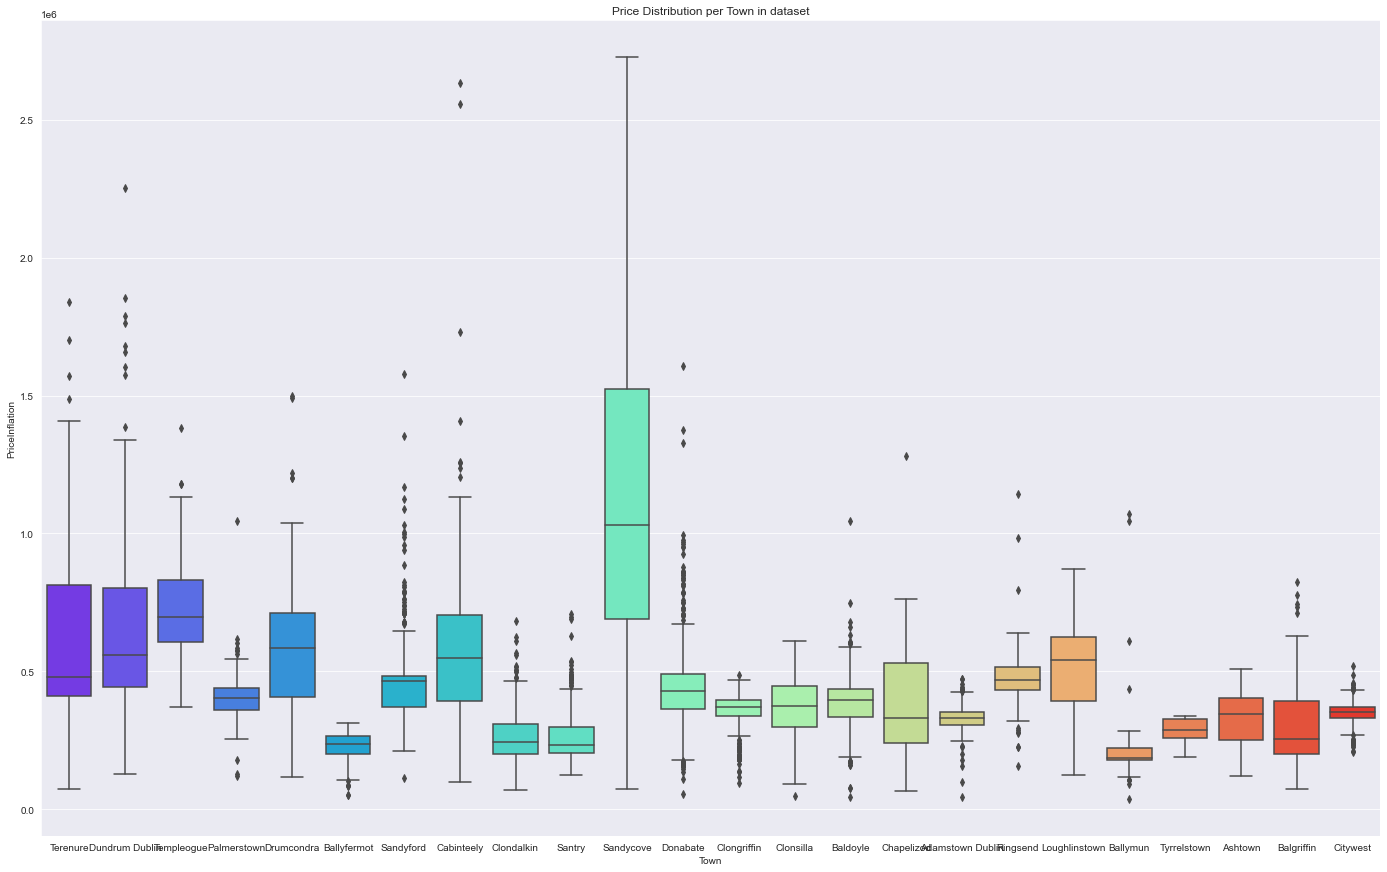

In [19]:
plt.figure(figsize = (24, 15))
sns.boxplot(x = 'Town', y = 'PriceInflation', data = irl, palette='rainbow')
plt.title("Price Distribution per Town in dataset")

Text(0.5, 1.0, 'Price Distribution per Eircode in dataset')

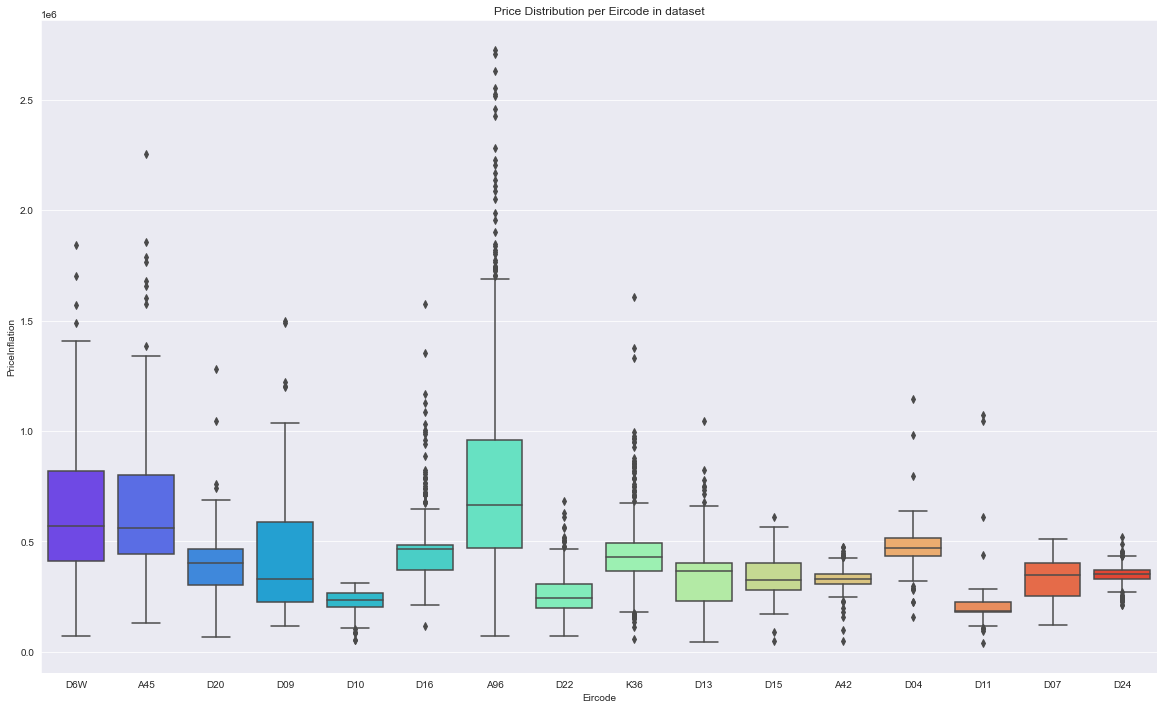

In [21]:
plt.figure(figsize = (20, 12))
sns.boxplot(x = 'Eircode', y = 'PriceInflation', data = irl, palette = 'rainbow')
plt.title("Price Distribution per Eircode in dataset")

### Neighbourhood Prices

<AxesSubplot:title={'center':'Most Expensive Neighbourhoods in Dublin 2014-2021 by Current Market value'}, xlabel='Neighbourhood', ylabel='Price (Millions Euro)'>

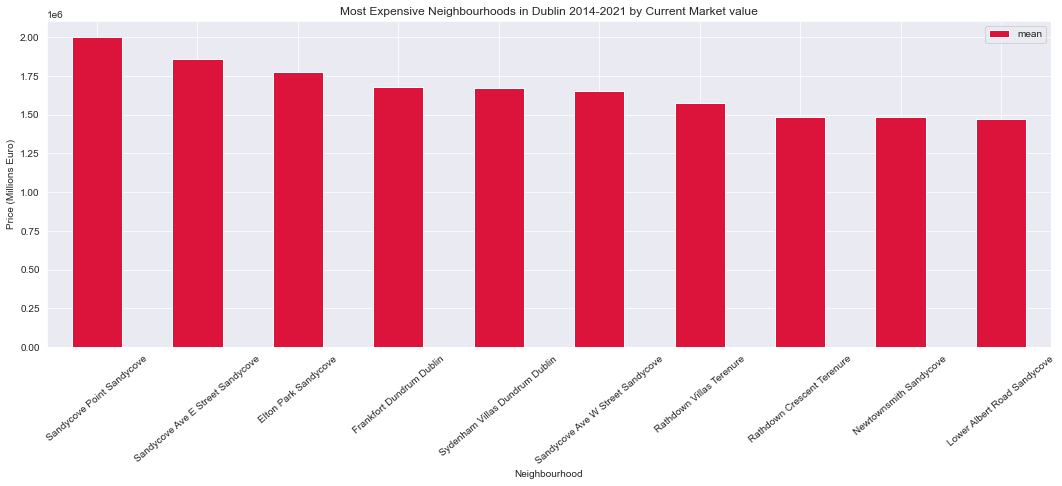

In [26]:
grouped_multiple_1 = irl.groupby(['Neighbourhood']).agg({'PriceInflation': ['mean', 'median', 'max']})
grouped_multiple_1.columns = ['mean', 'med', 'max']
grouped_multiple_1 = grouped_multiple_1.reset_index()
grouped_multiple_1 = pd.DataFrame(grouped_multiple_1)
distdf_1 = grouped_multiple_1.sort_values(by=['mean'], ascending=False)[:10]
distdf_1.plot.bar(x = 'Neighbourhood', y = 'mean', rot = 40, figsize = (18, 6), color = 'crimson', xlabel = 'Neighbourhood', ylabel = 'Price (Millions Euro)', title = 'Most Expensive Neighbourhoods in Dublin 2014-2021 by Current Market value')